<a href="https://colab.research.google.com/github/PilarAriasVazquez/deeplearning/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()# Descarga los datos de MNIST

In [3]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255


In [4]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)
validation_images = train_images[50000:]
validation_labels = train_labels[50000:]
train_images = train_images[:49999]
train_labels = train_labels[:49999]


In [5]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  

  network = models.Sequential()
  if regularizador==0:
    network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
  elif regularizador==1:
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28*28,))) 
  elif regularizador==2:
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28*28,))) 
  elif regularizador==3:    
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu', input_shape=(28*28,))) 
  elif regularizador==4: 
    network.add(layers.Dense(512, activation='relu', input_shape=(28*28,))) 
    network.add(layers.Dropout(0.5))
  else:  
    print('Error, no se ha introducido un valor válido')
    return 0
  network.add(layers.Dense(10, activation='softmax'))      
  network.summary()
  return network

In [6]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return modelo

In [7]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
  history= modelo.fit(train_images, train_labels,
                       epochs=30, batch_size=128,
                       validation_data=(validation_images, validation_labels))
  return history

In [8]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [9]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [10]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
network0 = compila_modelo(network0)

In [12]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 4s 6ms/step - loss: 0.2835 - accuracy: 0.9176 - val_loss: 0.1685 - val_accuracy: 0.9525
Epoch 2/30
391/391 [==============================] - 2s 6ms/step - loss: 0.1157 - accuracy: 0.9663 - val_loss: 0.0958 - val_accuracy: 0.9722
Epoch 3/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0757 - accuracy: 0.9774 - val_loss: 0.0848 - val_accuracy: 0.9755
Epoch 4/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0543 - accuracy: 0.9836 - val_loss: 0.0784 - val_accuracy: 0.9785
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0404 - accuracy: 0.9883 - val_loss: 0.0747 - val_accuracy: 0.9793
Epoch 6/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0302 - accuracy: 0.9911 - val_loss: 0.0833 - val_accuracy: 0.9762
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0231 - accuracy: 0.9937 - val_loss: 0.0827 - val_accuracy: 0.9762
Epoch 

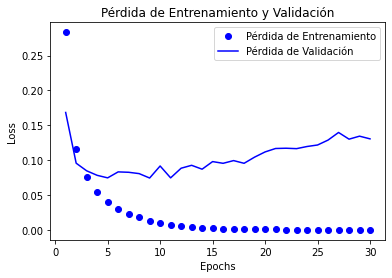

In [13]:
pinta_perdida_entrenamiento_validacion(historia0)

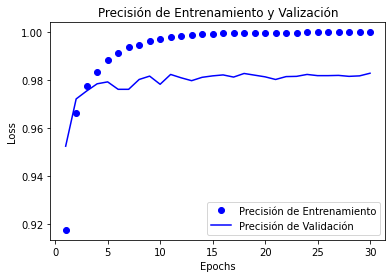

In [14]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [15]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [16]:
network1 = compila_modelo(network1)

In [17]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1284 - accuracy: 0.8460 - val_loss: 1.0923 - val_accuracy: 0.8580
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9625 - accuracy: 0.8812 - val_loss: 0.8730 - val_accuracy: 0.8945
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8370 - accuracy: 0.9023 - val_loss: 0.7676 - val_accuracy: 0.9187
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7632 - accuracy: 0.9148 - val_loss: 0.7150 - val_accuracy: 0.9260
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7122 - accuracy: 0.9239 - val_loss: 0.6670 - val_accuracy: 0.9383
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6757 - accuracy: 0.9301 - val_loss: 0.6605 - val_accuracy: 0.9377
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6487 - accuracy: 0.9335 - val_loss: 0.6137 - val_accuracy: 0.9461
Epoch 

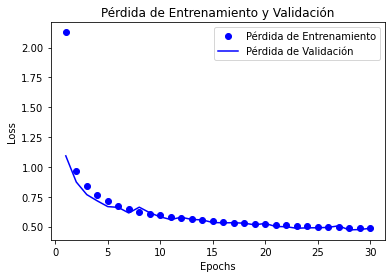

In [18]:
pinta_perdida_entrenamiento_validacion(historia1)

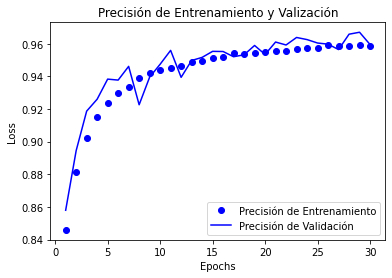

In [19]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [20]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [21]:
network2 = compila_modelo(network2)

In [22]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5257 - accuracy: 0.9133 - val_loss: 0.3117 - val_accuracy: 0.9479
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2648 - accuracy: 0.9543 - val_loss: 0.2191 - val_accuracy: 0.9669
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.2101 - accuracy: 0.9628 - val_loss: 0.2070 - val_accuracy: 0.9628
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1860 - accuracy: 0.9677 - val_loss: 0.1839 - val_accuracy: 0.9677
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1739 - accuracy: 0.9699 - val_loss: 0.2084 - val_accuracy: 0.9599
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1656 - accuracy: 0.9708 - val_loss: 0.2304 - val_accuracy: 0.9492
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1579 - accuracy: 0.9723 - val_loss: 0.1791 - val_accuracy: 0.9664
Epoch 

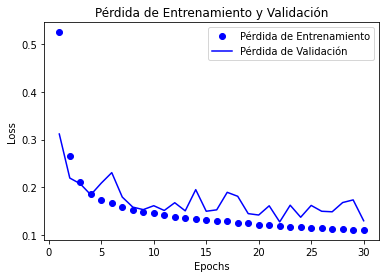

In [23]:
pinta_perdida_entrenamiento_validacion(historia2)

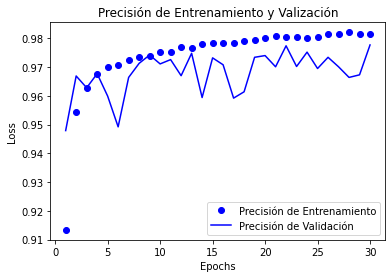

In [24]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [25]:
network3 = crea_modelo(3)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [26]:
network3 = compila_modelo(network3)

In [27]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1527 - accuracy: 0.8402 - val_loss: 1.0188 - val_accuracy: 0.8732
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.9797 - accuracy: 0.8757 - val_loss: 0.8718 - val_accuracy: 0.8986
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8581 - accuracy: 0.8977 - val_loss: 0.8656 - val_accuracy: 0.8862
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7835 - accuracy: 0.9118 - val_loss: 0.7323 - val_accuracy: 0.9316
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7347 - accuracy: 0.9195 - val_loss: 0.7104 - val_accuracy: 0.9246
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6976 - accuracy: 0.9266 - val_loss: 0.6973 - val_accuracy: 0.9244
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6673 - accuracy: 0.9314 - val_loss: 0.6324 - val_accuracy: 0.9447
Epoch 

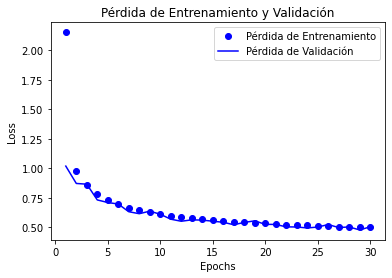

In [28]:
pinta_perdida_entrenamiento_validacion(historia3)

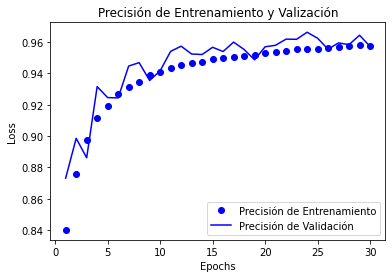

In [29]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [30]:
network4 = crea_modelo(4)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
network4 = compila_modelo(network4)

In [32]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3456 - accuracy: 0.8979 - val_loss: 0.1694 - val_accuracy: 0.9527
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1698 - accuracy: 0.9495 - val_loss: 0.1165 - val_accuracy: 0.9671
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1287 - accuracy: 0.9615 - val_loss: 0.0932 - val_accuracy: 0.9723
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1044 - accuracy: 0.9684 - val_loss: 0.0937 - val_accuracy: 0.9749
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0909 - accuracy: 0.9728 - val_loss: 0.0823 - val_accuracy: 0.9770
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0815 - accuracy: 0.9754 - val_loss: 0.0856 - val_accuracy: 0.9767
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0751 - accuracy: 0.9774 - val_loss: 0.0806 - val_accuracy: 0.9786
Epoch 

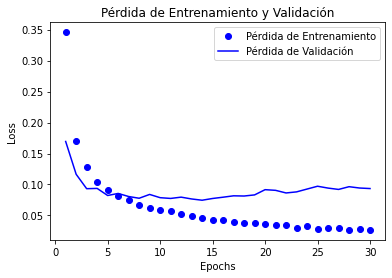

In [33]:
pinta_perdida_entrenamiento_validacion(historia4)

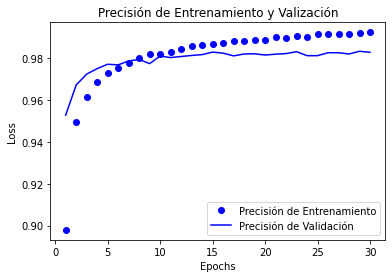

In [34]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [35]:
network5 = crea_modelo(5)

Error, no se ha introducido un valor válido


### CONCLUSIONES

Caso 0 - Epoch 18/30 - val_accuracy: 0.9828

Caso 1 - Epoch 29/30 - val_accuracy: 0.9670

Caso 2 - Epoch 30/30 - val_accuracy: 0.9777

Caso 3 - Epoch 24/30 - val_accuracy: 0.9663

Caso 4 - Epoch 29/30 - val_accuracy: 0.9832


Observamos para cada caso la precisión más alta posible, con la época correspondiente que lo ha conseguido. Se observa que el caso 0 y el caso 4 son los que más se aproximan a conseguir la precisión más alta. Pero el caso 4 supera por 0.004, por lo que el regularizador dropout es el que mejor ajusta este caso. 
